In [5]:
# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [6]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [7]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [8]:
# Now for a single image 
print(X_train[0].shape)
#X_train = np.reshape(X_train, (X_train.shape[0], -1))
#print(X_train.shape)

(32, 32, 3)


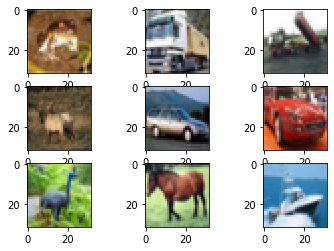

In [9]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + i + 1)
    img = X_train[i].transpose([0,1,2])
    plt.imshow(img)
    
# show the plot
plt.show()

In [10]:
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [12]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [24]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()
    model.add(Conv2D(3, 32, 32, input_shape=(32, 32, 3)))

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights, by_name=True)
    
    # return model
    return model


In [25]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 3
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

c:\users\indian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (32, 32), input_shape=(32, 32, 3...)`
  if __name__ == '__main__':


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 1, 1, 3)           9219      
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 1, 1, 96)          2688      
_________________________________________________________________
activation_78 (Activation)   (None, 1, 1, 96)          0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 1, 1, 96)          83040     
_________________________________________________________________
activation_79 (Activation)   (None, 1, 1, 96)          0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 1, 1, 96)          83040     
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 1, 96)        

In [26]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

c:\users\indian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (32, 32), input_shape=(32, 32, 3...)`
  if __name__ == '__main__':


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 1, 1, 3)           9219      
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 1, 1, 96)          2688      
_________________________________________________________________
activation_85 (Activation)   (None, 1, 1, 96)          0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 1, 1, 96)          83040     
_________________________________________________________________
activation_86 (Activation)   (None, 1, 1, 96)          0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 1, 1, 96)          83040     
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 1, 96)        

In [27]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 35ms/step


In [28]:
# print our predictions
print(predictions)

[[0.09999984 0.09999984 0.09999998 0.10000026 0.10000006 0.10000005
  0.09999993 0.09999982 0.10000034 0.09999999]
 [0.10000005 0.10000013 0.09999967 0.10000011 0.10000031 0.10000002
  0.09999988 0.10000003 0.09999992 0.09999992]
 [0.09999971 0.09999981 0.09999992 0.10000044 0.10000007 0.09999995
  0.09999983 0.09999974 0.10000044 0.10000005]
 [0.09999979 0.09999974 0.09999992 0.10000031 0.10000011 0.10000004
  0.09999989 0.09999977 0.10000035 0.10000003]
 [0.09999985 0.09999981 0.09999994 0.1000002  0.10000009 0.10000004
  0.09999992 0.09999983 0.10000025 0.10000001]
 [0.10000024 0.10000084 0.099999   0.10000023 0.10000112 0.09999985
  0.09999905 0.09999987 0.09999952 0.10000032]
 [0.09999997 0.09999999 0.09999986 0.10000011 0.10000015 0.09999994
  0.09999985 0.10000002 0.10000005 0.10000009]
 [0.10000002 0.10000015 0.09999979 0.1000001  0.10000019 0.09999993
  0.09999973 0.09999996 0.10000005 0.10000013]
 [0.10000009 0.10000033 0.09999961 0.10000008 0.10000034 0.09999994
  0.09999964

In [29]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
1.0
0.9999999
1.0
1.0
1.0
1.0
0.99999994


In [30]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[8 4 3 8 8 4 4 4 4]


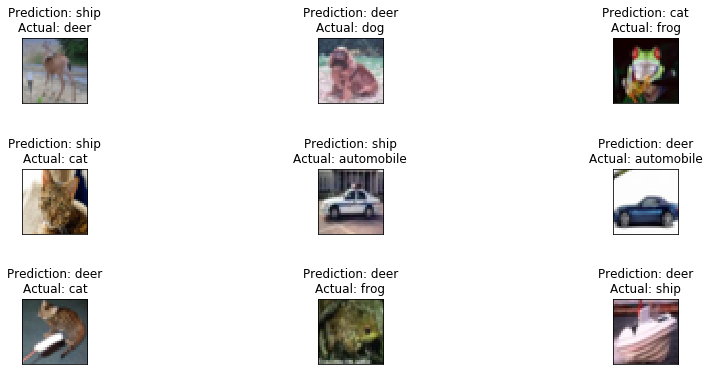

In [32]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()